In [ ]:
# 1.
# 학습용 테스트용 데이터 분류
# 학습
# 평가  .score   ->accuracy  

# 2.
# 각종시각화를 통해 컬럼의  특성을 파악
# 학습용 컬럼을 선정
# 전처리
# 학습
# 평가  .score   ->accuracy  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# %pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [17]:
wine_quality.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


# 1. 조정없이 KNN

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

len(X_train),len(X_test),len(y_train),len(y_test)
X_train.shape

(4547, 11)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

score = knn.score(X_test,y_test) #Accuracy
print(score)


0.47897435897435897


c:\python_src\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 2. 조정ㅇㅇ KNN

## oversampling
- 정보 손실 없이 소수클래스의 특징을 강화 -> 데이터 증강
- SMOTE (Systhhic Ninority Over-sampling Technique)
- 비슷한 데이터들 사이에 새로운 데이터를 생성 -> 기존 데이터의 정보 활용

##### oversampling 예제

In [ ]:

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE

X,y = make_classification(n_samples=1000, n_classes=2, random_state=42, weights=[0.95,0.05])
print(f'original shape: {Counter(y)}')

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)
print(f'resampled shape: {Counter(y_resampled)}')

original shape: Counter({np.int64(0): 947, np.int64(1): 53})
resampled shape: Counter({np.int64(0): 947, np.int64(1): 947})


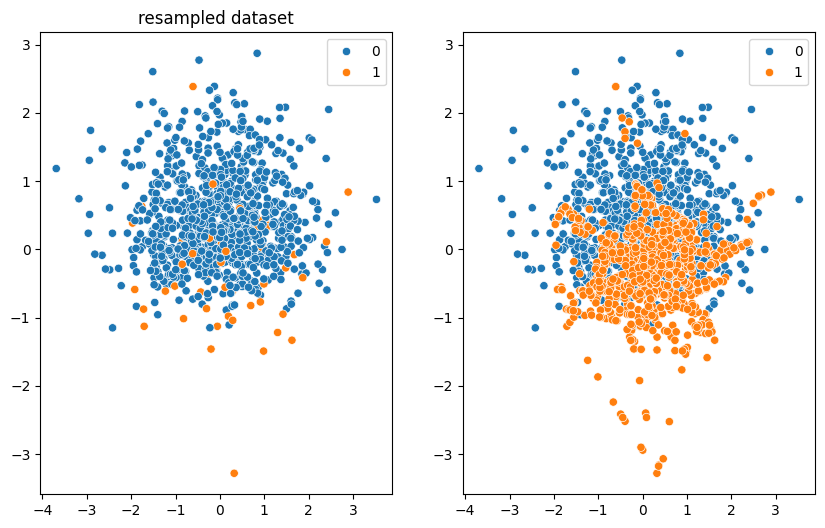

In [16]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(1,2, figsize=(10,6))

sns.scatterplot(x = X[:,0], y=X[:,1],hue=y,ax=ax[0])
ax[0].set_title('original dataset')

sns.scatterplot(x = X_resampled[:,0], y=X_resampled[:,1],hue=y_resampled,ax=ax[1])
ax[0].set_title('resampled dataset')

plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=10)

len(X_train),len(X_test),len(y_train),len(y_test)
X_train.shape

(1325, 20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

score = knn.score(X_test,y_test) #분류 -> Accuracy / 회귀 -> R2
print(score)

0.9050966608084359


##### 적용

In [20]:
wine_quality.data.features.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000
